In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('GHCD.csv')

In [2]:
data.head()

,mental_health_score,current_emotional_issues,social_activity,mental_health,quality_of_life,social_activity_fulfillment,physical_health_score,current_pain,current_fatigue,physical_activity_fulfillment,physical_health,general_health
0,38.8,3,3,0,2,2,50.8,0,1,1,4,3
1,56.0,2,3,4,4,3,39.8,8,2,1,4,3
2,56.0,2,3,4,4,3,39.8,8,2,1,4,3
3,53.3,0,2,4,2,2,54.1,0,0,1,4,1
4,50.8,2,2,3,4,3,39.8,1,4,1,4,4


In [3]:
data.describe()

,mental_health_score,current_emotional_issues,social_activity,mental_health,quality_of_life,social_activity_fulfillment,physical_health_score,current_pain,current_fatigue,physical_activity_fulfillment,physical_health,general_health
count,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000,8106.000000
mean,45.108019,1.998273,2.124229,2.142734,2.332223,2.399951,46.806304,2.979028,1.618801,3.436097,1.895756,1.930545
std,9.314918,1.064831,1.140251,1.103740,1.050033,1.055952,8.608766,2.540297,0.989276,0.926104,1.066043,1.045651
min,21.200000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.800000,1.000000,1.000000,1.000000,2.000000,2.000000,42.300000,1.000000,1.000000,3.000000,1.000000,1.000000
50%,45.800000,2.000000,2.000000,2.000000,2.000000,3.000000,47.700000,3.000000,2.000000,4.000000,2.000000,2.000000
75%,50.800000,3.000000,3.000000,3.000000,3.000000,3.000000,54.100000,5.000000,2.000000,4.000000,3.000000,3.000000
max,67.600000,4.000000,4.000000,4.000000,4.000000,4.000000,67.700000,10.000000,4.000000,4.000000,4.000000,4.000000


In [4]:
data.columns

Index(['mental_health_score', 'current_emotional_issues', 'social_activity',
       'mental_health', 'quality_of_life', 'social_activity_fulfillment',
       'physical_health_score', 'current_pain', 'current_fatigue',
       'physical_activity_fulfillment', 'physical_health', 'general_health'],
      dtype='object')

In [5]:
data.shape

(8106, 12)

In [6]:
data['general_health'].unique()

array([3, 1, 4, 2, 0])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8106 entries, 0 to 8105
Data columns (total 12 columns):
mental_health_score              8106 non-null float64
current_emotional_issues         8106 non-null int64
social_activity                  8106 non-null int64
mental_health                    8106 non-null int64
quality_of_life                  8106 non-null int64
social_activity_fulfillment      8106 non-null int64
physical_health_score            8106 non-null float64
current_pain                     8106 non-null int64
current_fatigue                  8106 non-null int64
physical_activity_fulfillment    8106 non-null int64
physical_health                  8106 non-null int64
general_health                   8106 non-null int64
dtypes: float64(2), int64(10)
memory usage: 760.0 KB


In [8]:
print(data.groupby('general_health').size())

general_health
0     810
1    1865
2    2946
3    2048
4     437
dtype: int64


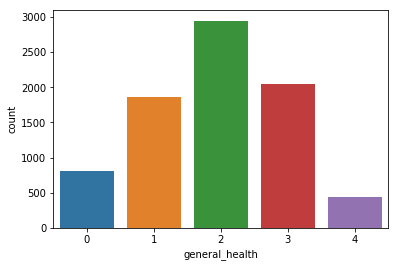

In [9]:
import seaborn as sns
sns.countplot(data['general_health'], label="Count")

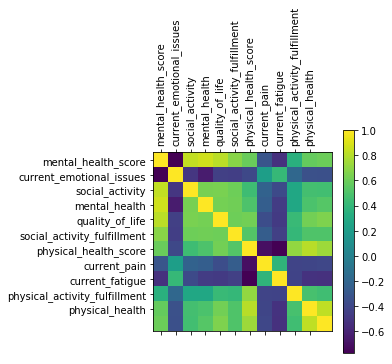

In [12]:
plt.matshow(data.corr())
plt.yticks(range(11), data.columns)
plt.xticks(range(11), data.columns, rotation = 90)
plt.colorbar()
plt.show()

# K Nearest Neighbors

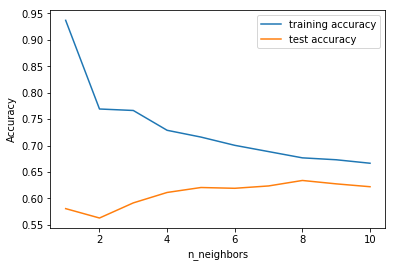

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'general_health'], data['general_health'], stratify=data['general_health'], random_state=66)
#training and test data is split in the above steps
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [14]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.677
Accuracy of K-NN classifier on test set: 0.634


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.648
Test set score: 0.650


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set accuracy: 0.627
Test set accuracy: 0.630


In [17]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set accuracy: 0.657
Test set accuracy: 0.662


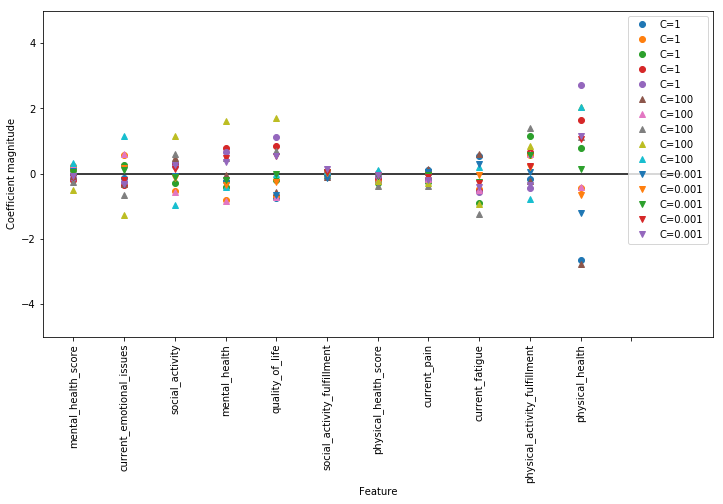

In [18]:
data_features = [x for i,x in enumerate(data.columns) if i!=11]
plt.figure(figsize=(12,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(data.shape[1]), data_features, rotation=90)
plt.hlines(0, 0, data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.628


In [20]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)#need to avoid overfitting
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.710
Accuracy on test set: 0.703


In [21]:
print(f'Feature importance: {tree.feature_importances_}')

Feature importance: [0.         0.         0.         0.         0.03123623 0.
 0.         0.         0.         0.         0.96876377]


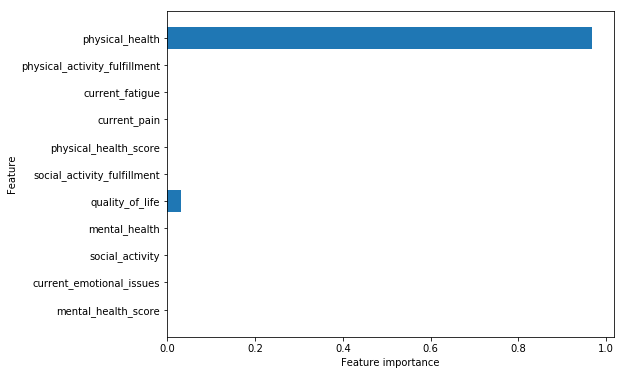

In [22]:
def plot_feature_importances_data(model):
    plt.figure(figsize=(8,6))
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_data(tree)
plt.savefig('feature_importance')

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.699


In [24]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.677
Accuracy on test set: 0.689


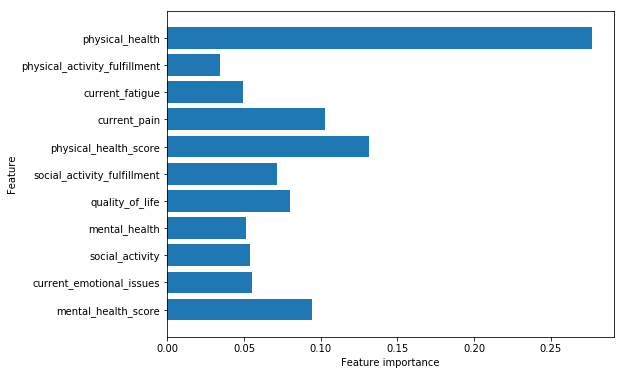

In [25]:
plot_feature_importances_data(rf)

# Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.742
Accuracy on test set: 0.705


In [27]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.710
Accuracy on test set: 0.703


In [28]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.714
Accuracy on test set: 0.709


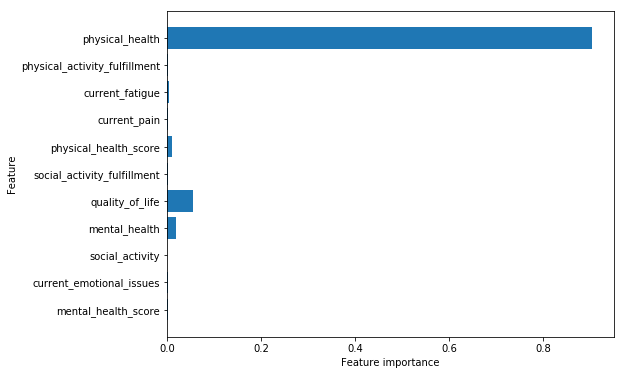

In [29]:
plot_feature_importances_data(gb2)

# Support Vector Machine

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.769
Accuracy on test set: 0.685


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.712
Accuracy on test set: 0.704


In [32]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.719
Accuracy on test set: 0.705


# Deep Learning

In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
#ideal: mean of 0, variance of 1

Accuracy on training set: 0.706
Accuracy on test set: 0.702


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Accuracy on training set: 0.730
Accuracy on test set: 0.705


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.737
Accuracy on test set: 0.699


In [36]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.710
Accuracy on test set: 0.707


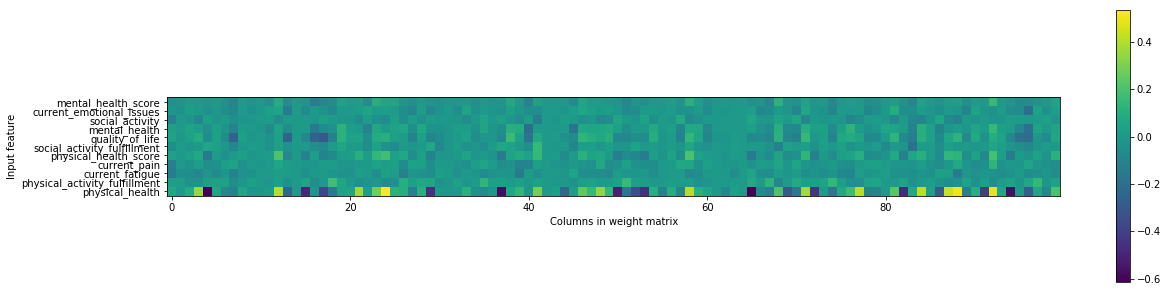

In [37]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(11), data_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [50]:
oeuvjnkcd=np.array([[40,0,4,2,2,3,40,7,2,3,1,]])
prediction=knn.predict(oeuvjnkcd)
print(prediction)

[1]
